# Koala Recognition NAME SPACE IT TASK


Lamima Tabassum Ava



In [44]:
!nvidia-smi

Mon Nov 27 02:29:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [3]:
# Pip install method

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone https://github.com/ultralytics/ultralytics.git
# %cd {HOME}/ultralytics
# !pip install -e .


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.

In [ ]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="QabuwsgNij5WOAtfdpK7")
project = rf.workspace("nameplate").project("koala-ag6b3")
dataset = project.version(1).download("yolov8")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to koala-1 in yolov8:: 100%|██████████| 850/850 [00:00<00:00, 6961.65it/s]


## Fine tuining Pretrained Y0L0V8


- Epoch: 25
- Image Size = 100
- plots=True
- seed: 1000
- batch: 8
- optimizer: SGD
- lr0: 0.01  

# Expriement :1

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=100 plots=True
batch: 8
Optimizer : SGD # other choices=['SGD', 'Adam', 'AdamW', 'RMSProp']
lr0: 0.01

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/koala-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=100, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, 

NameError: ignored

# Expriment 2

- Adding seed
- Increased number of epochs
- Increased number of batch sizes

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=64 plots=True
seed: 1000
batch: 12
lr0: 0.01

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/koala-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=64, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, o

# Expriement 3
 - Decreasing epochs size
 - Add one more parameter verbose
 - Seed remaining same
 - Increasing Batch sizes

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=100 plots=True
verbose = True
seed: 1000
batch: 32
lr0: 0.01

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/koala-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=100, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, 

# Expriement 5

In [29]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=100


/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/koala-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=100, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

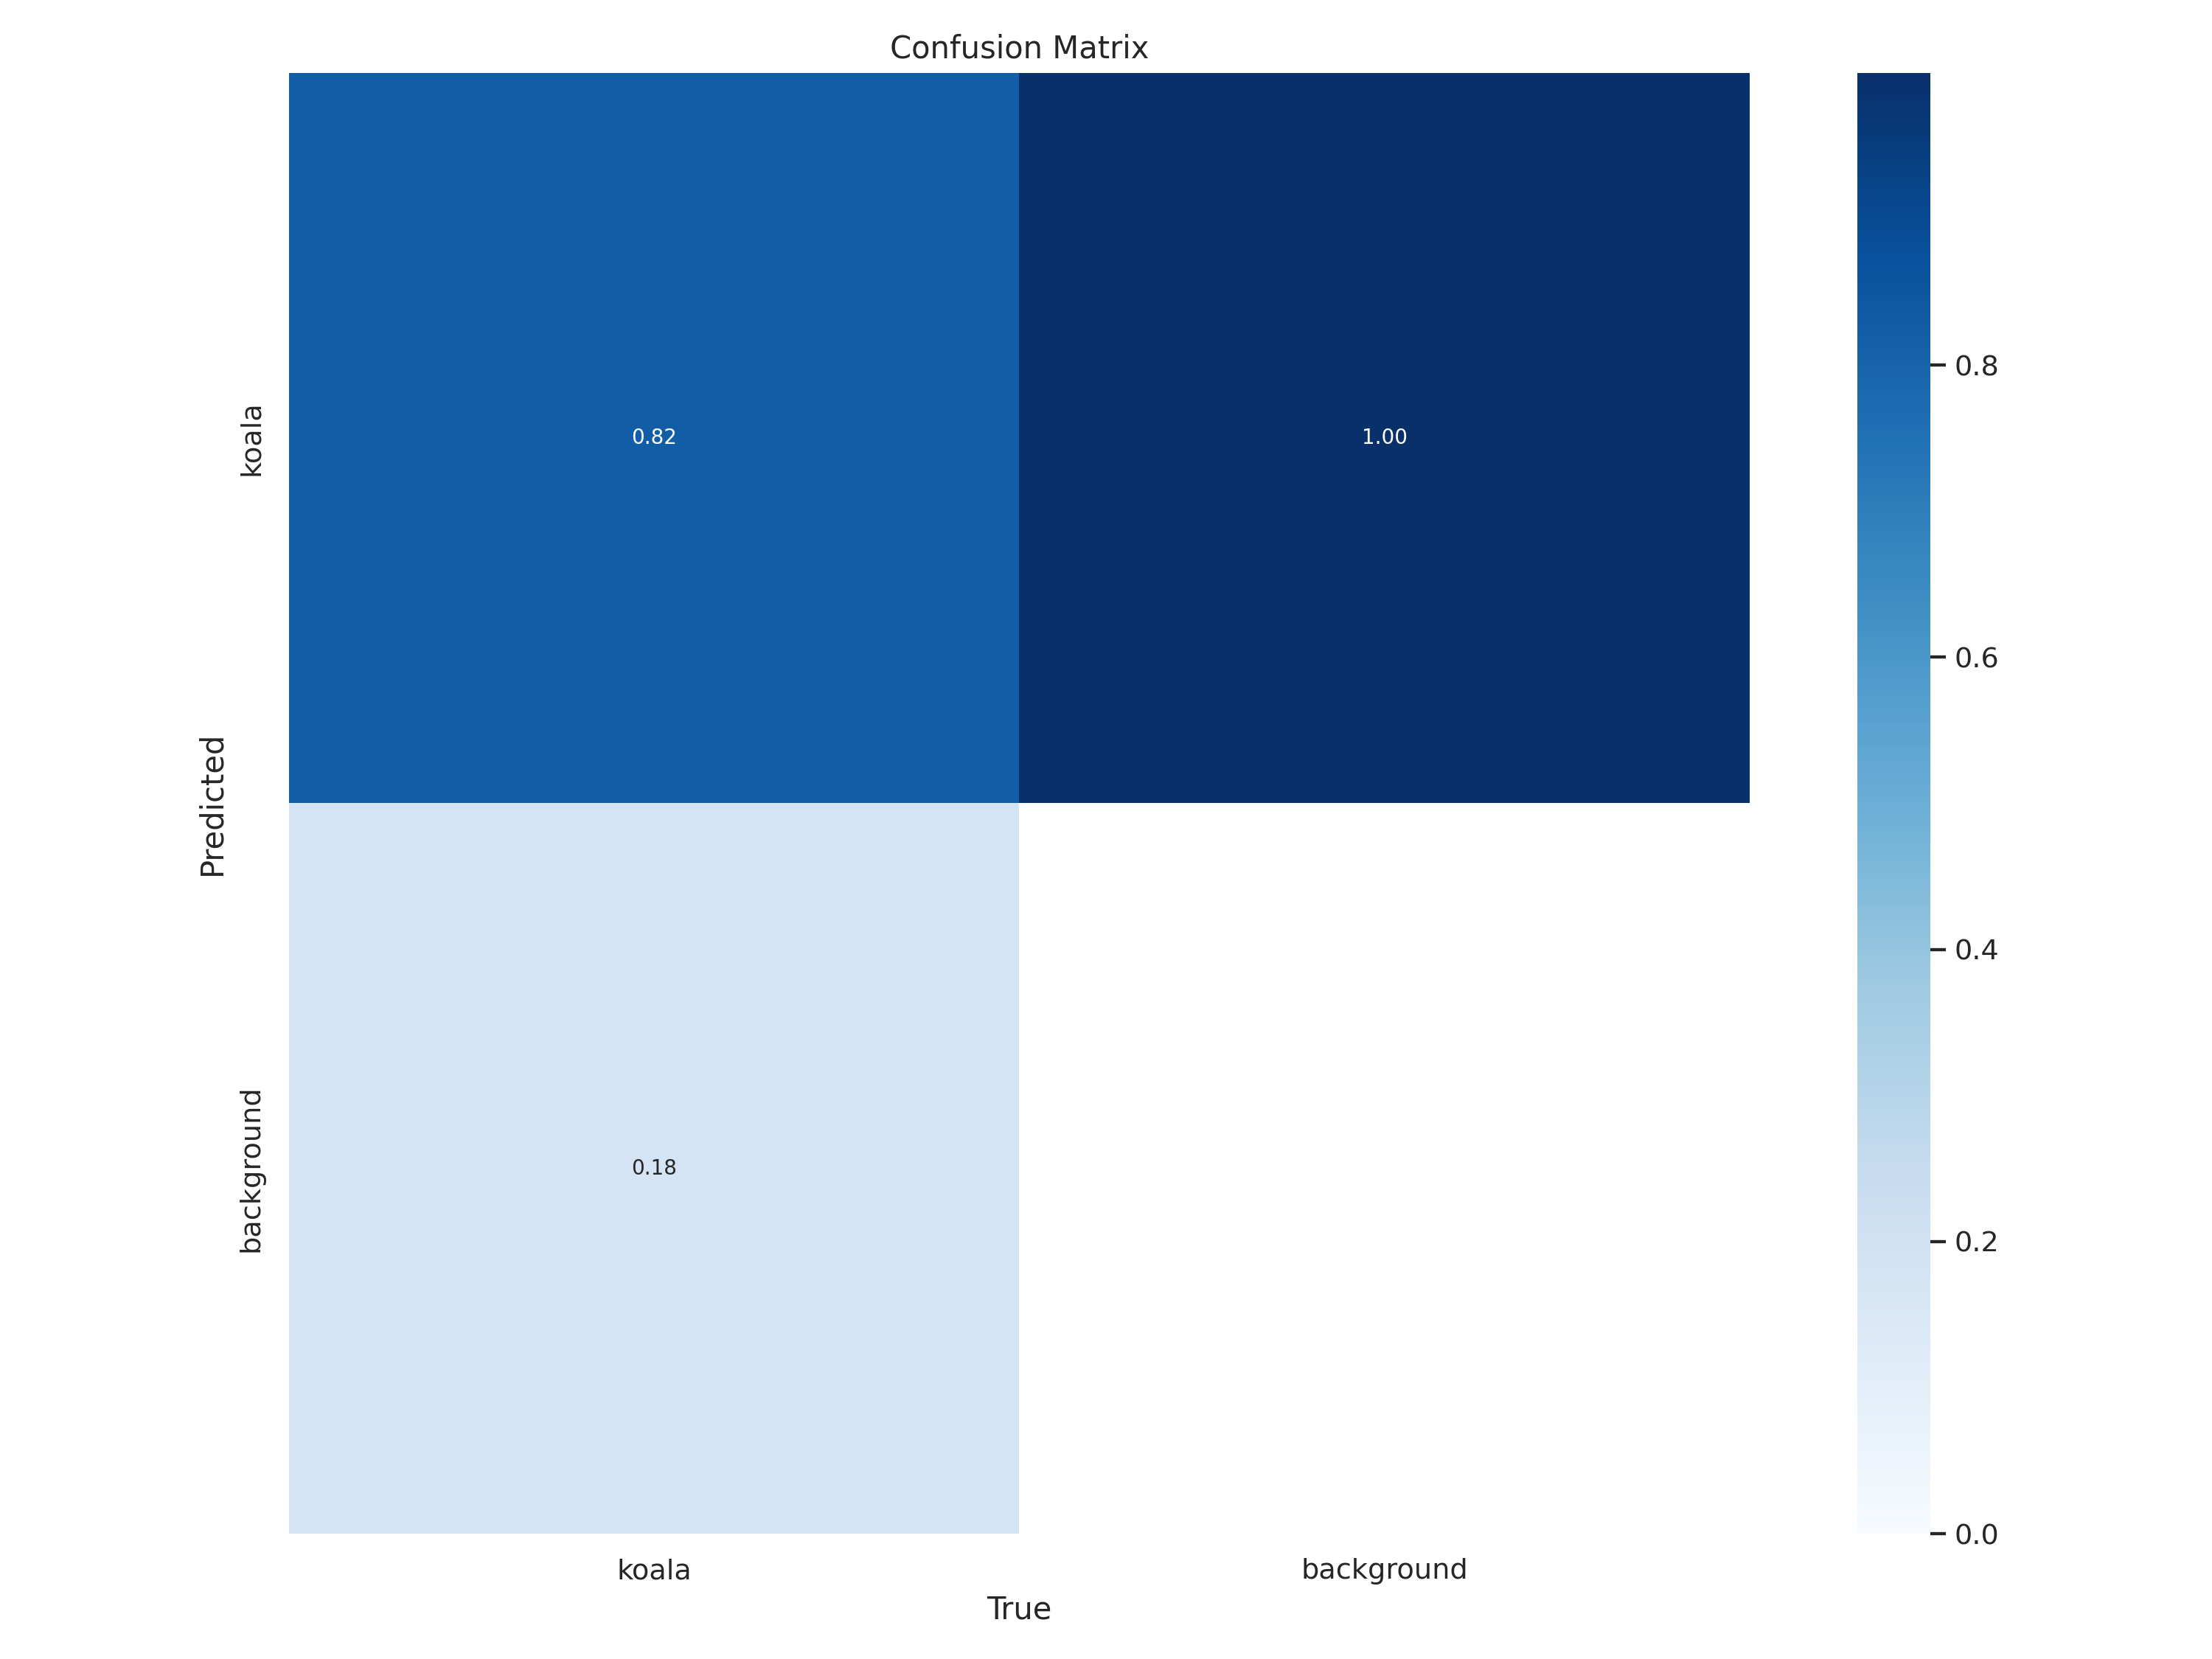

In [18]:
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png')


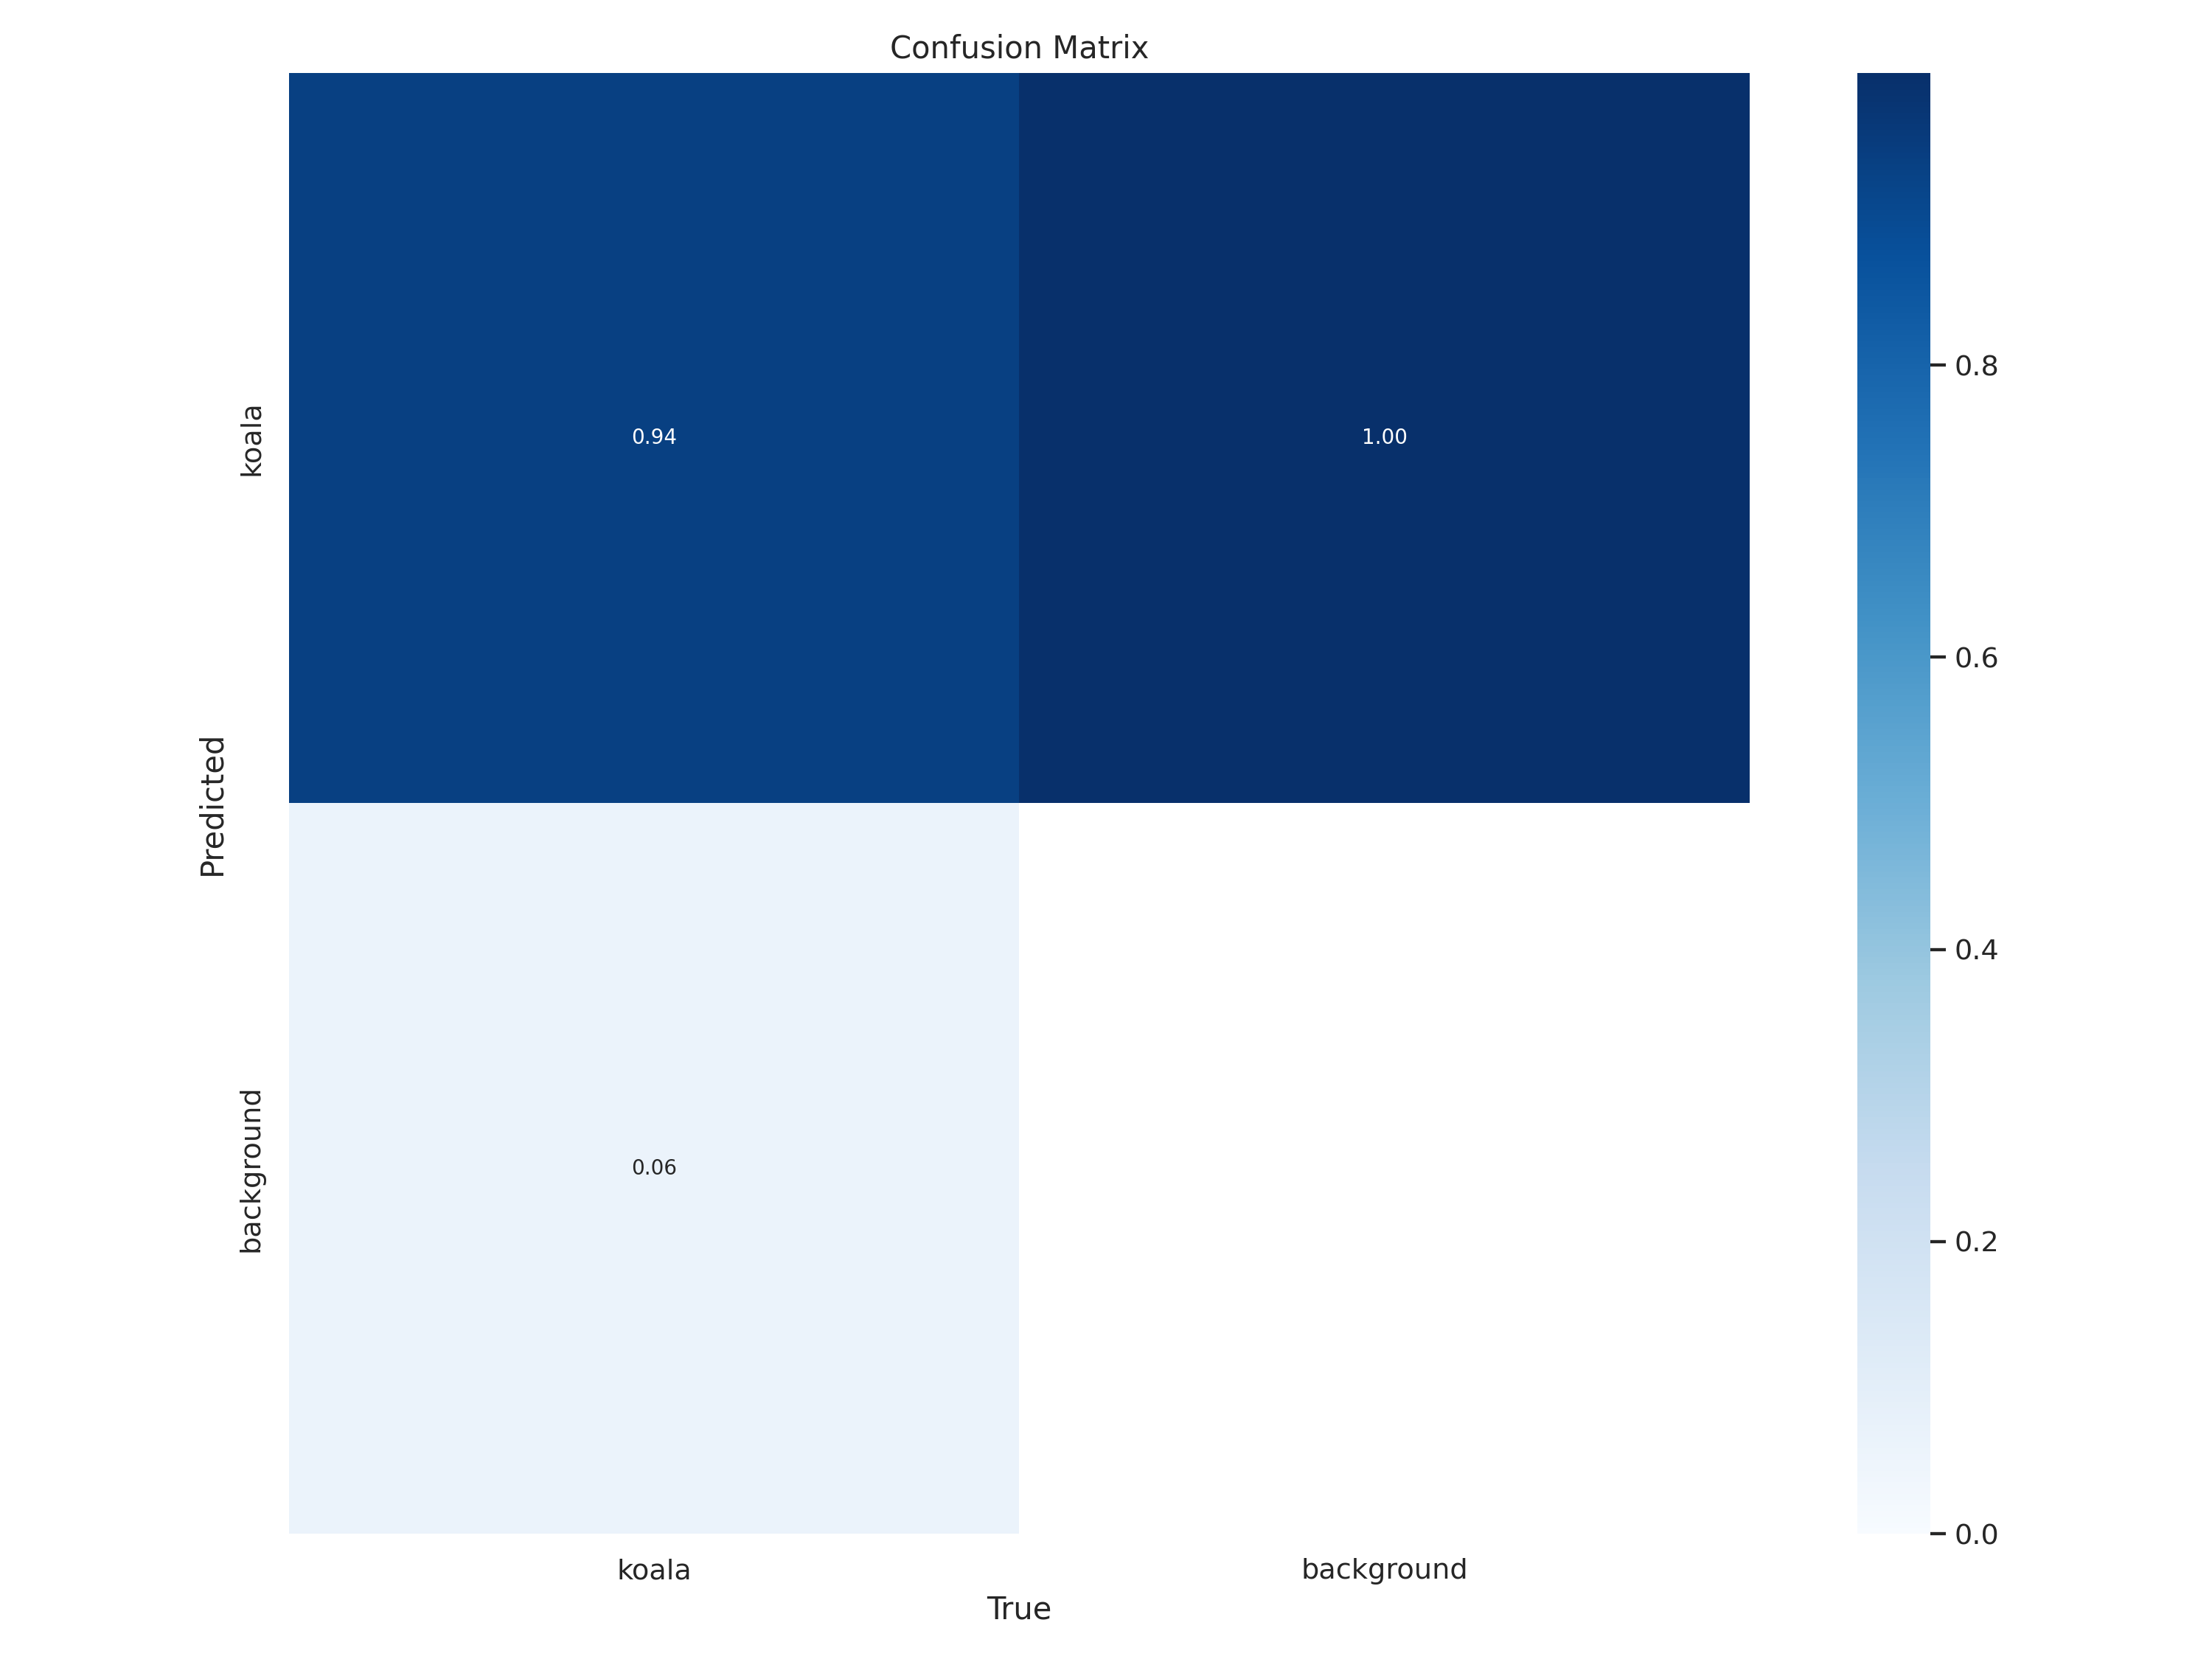

In [15]:
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png')

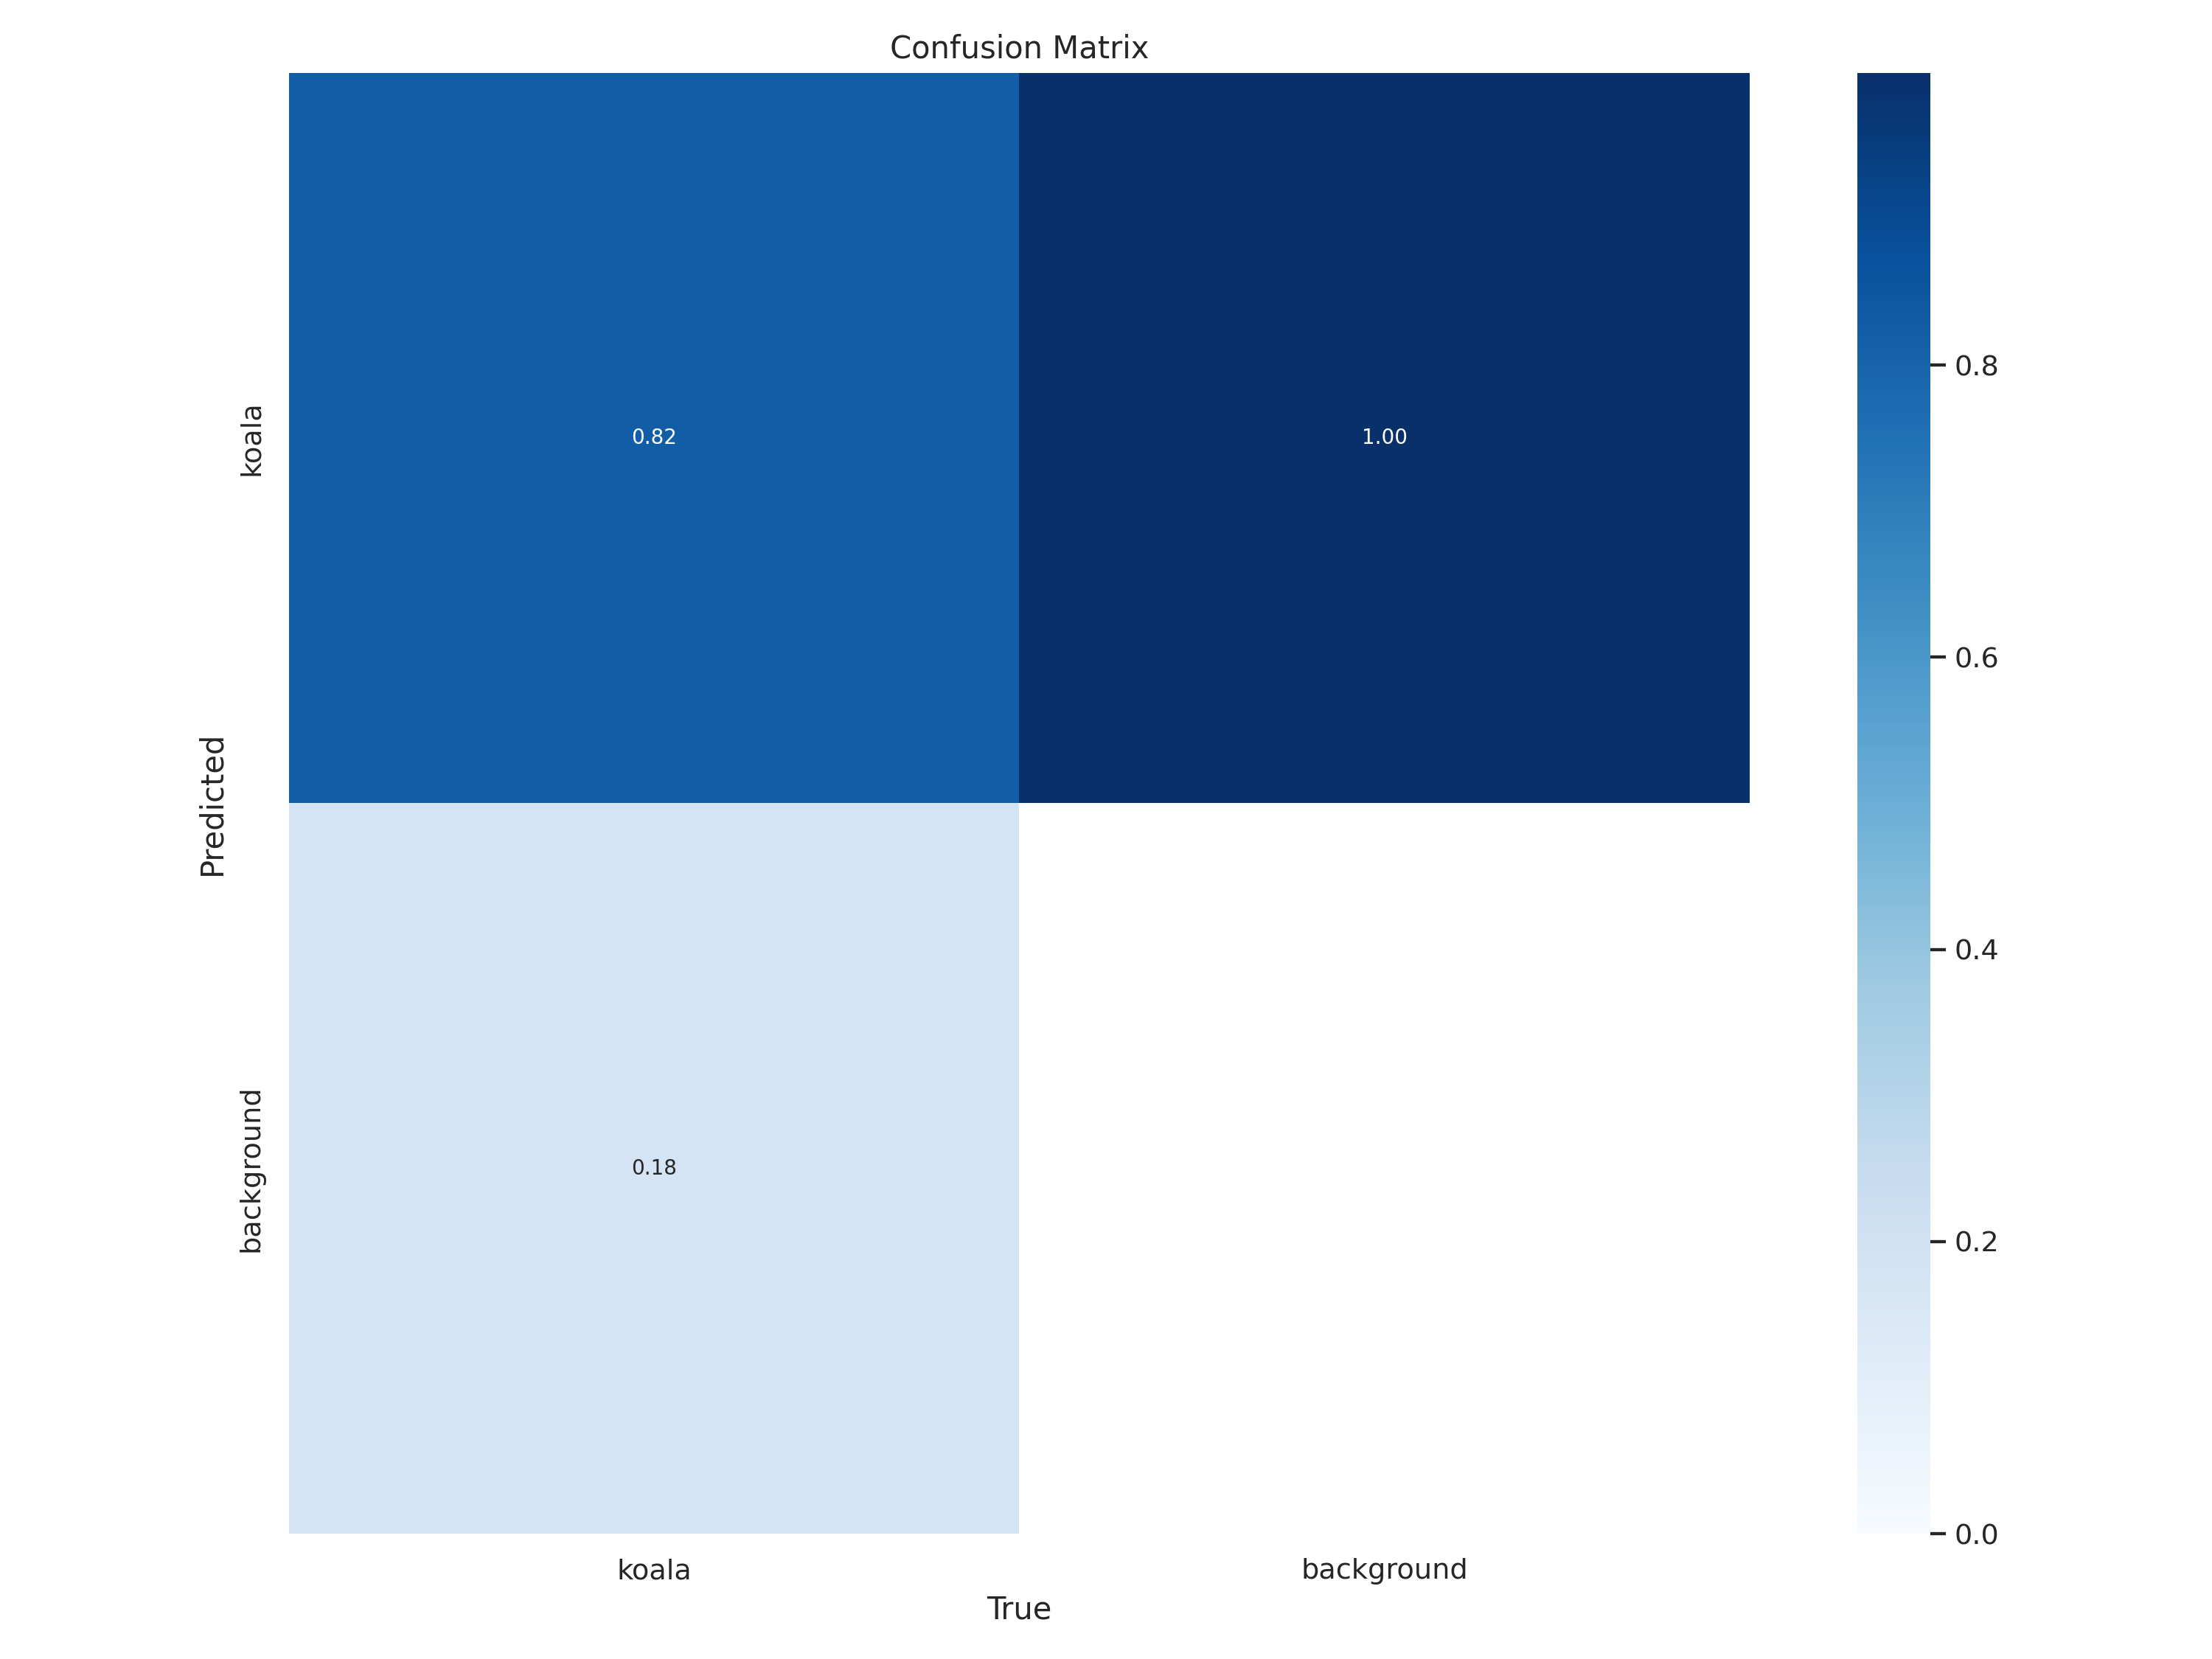

In [17]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png')

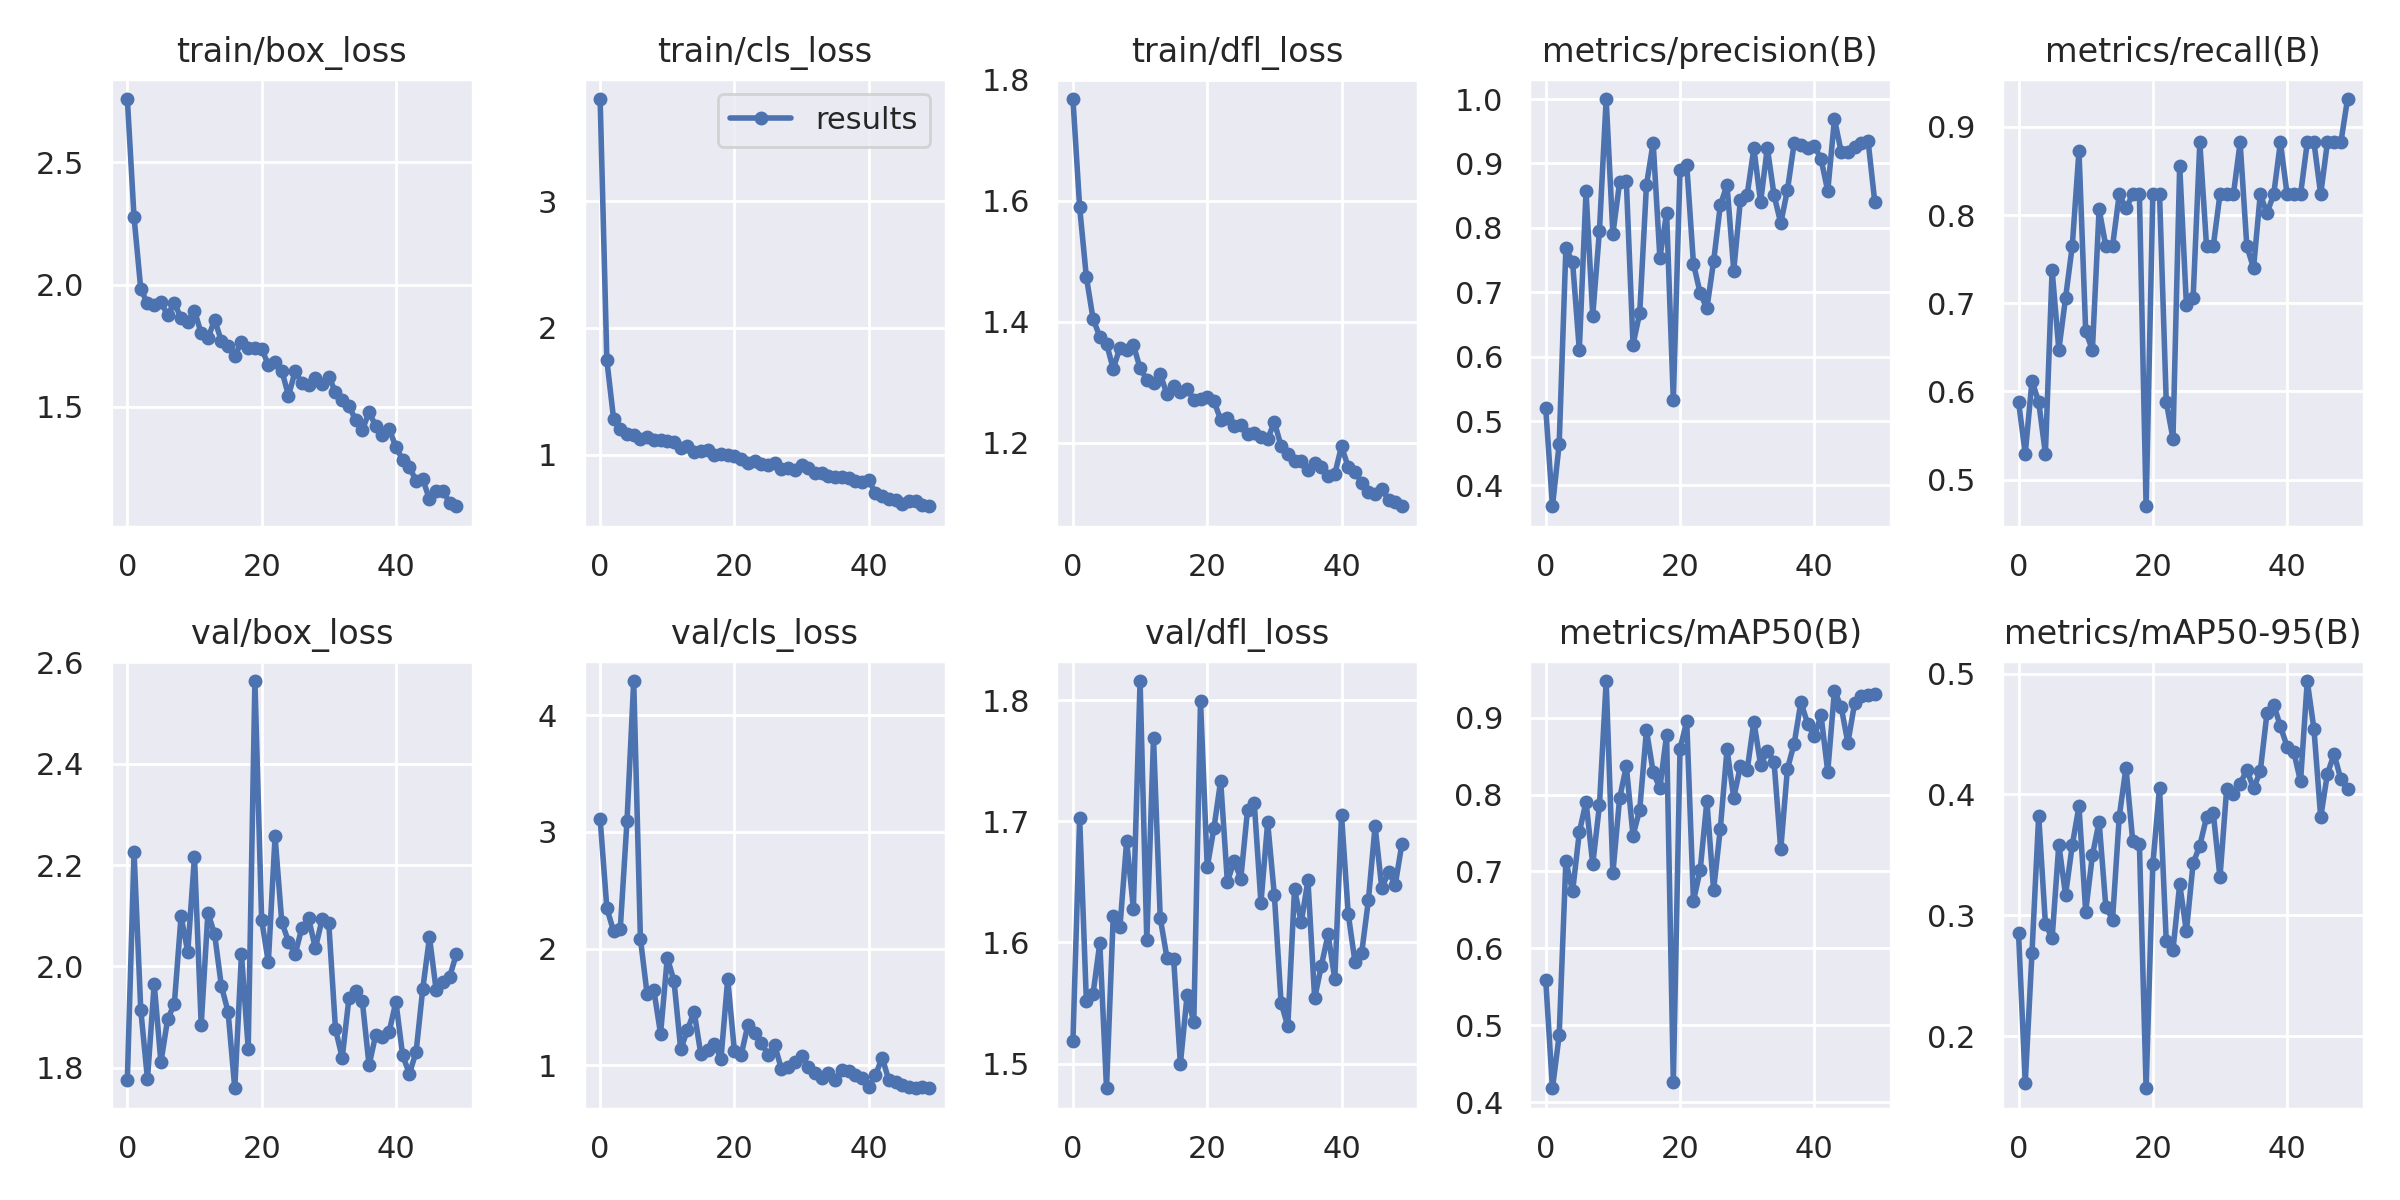

In [19]:
Image(filename=f'{HOME}/runs/detect/train3/results.png')


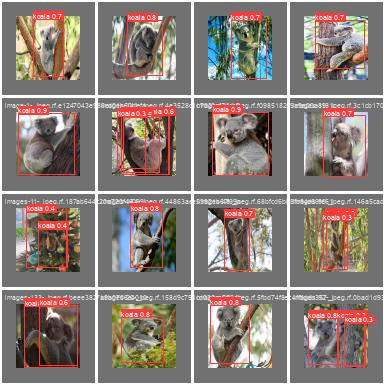

In [20]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg')


## Validate Custom Model

In [25]:
!yolo task=detect mode=val model='/content/runs/detect/train3/weights/best.pt' data='/content/datasets/koala-1/data.yaml'

2023-11-27 01:34:42.589220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 01:34:42.589278: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 01:34:42.589317: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 01:34:43.637557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/koala-1/valid/labels.cache... 16 image

In [30]:
!yolo task=detect mode=val model='/content/runs/detect/train5/weights/best.pt' data='/content/datasets/koala-1/data.yaml'

2023-11-27 02:04:47.831308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 02:04:47.831365: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 02:04:47.831401: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 02:04:48.837390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/koala-1/valid/labels.cache... 16 image

## Inference with Custom Model

In [28]:
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/datasets/koala-1/test/images' save=true

2023-11-27 01:39:02.039320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 01:39:02.039381: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 01:39:02.039421: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 01:39:03.076204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/16 /content/datasets/koala-1/test/images/images-1-_jpeg.rf.4f

In [33]:
!yolo task=detect mode=predict model='/content/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/datasets/koala-1/test/images' save=true

2023-11-27 02:09:01.545403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 02:09:01.545456: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 02:09:01.545491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 02:09:02.545619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/16 /content/datasets/koala-1/test/images/images-1-_jpeg.rf.4f

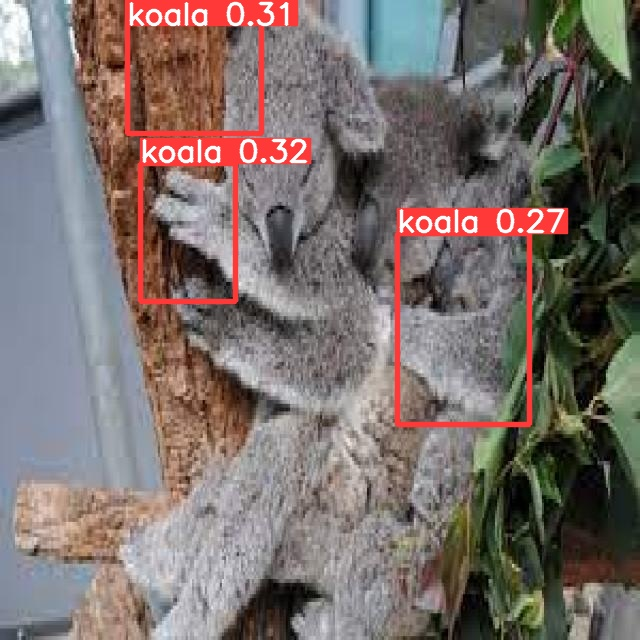

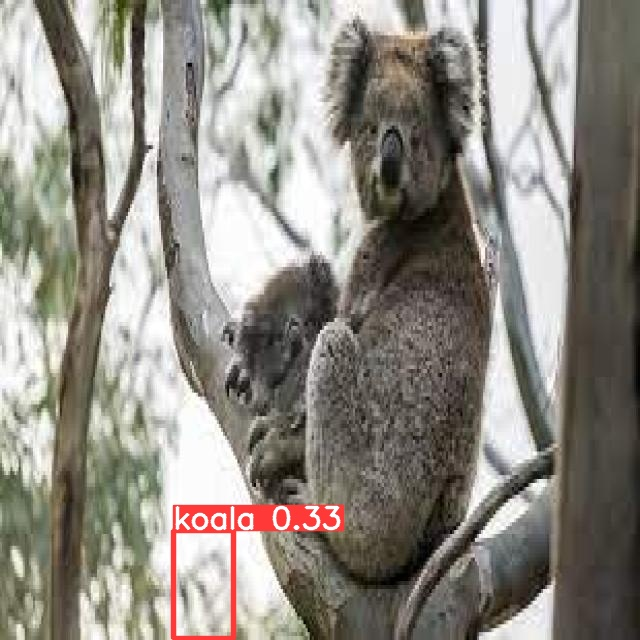

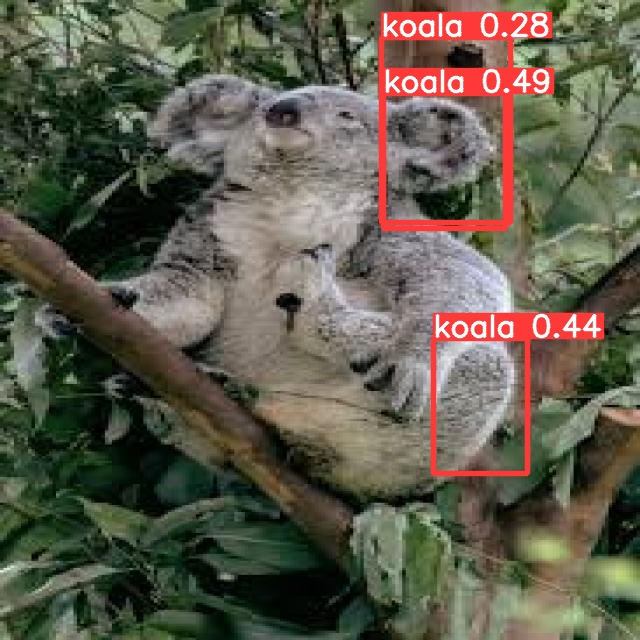

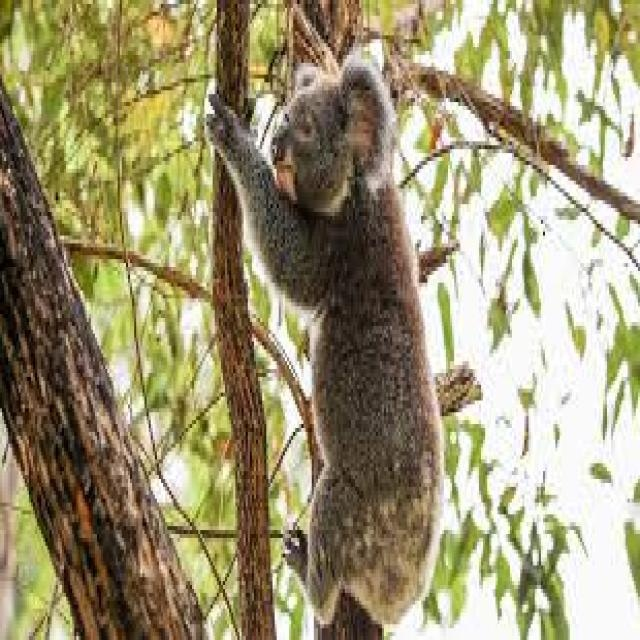

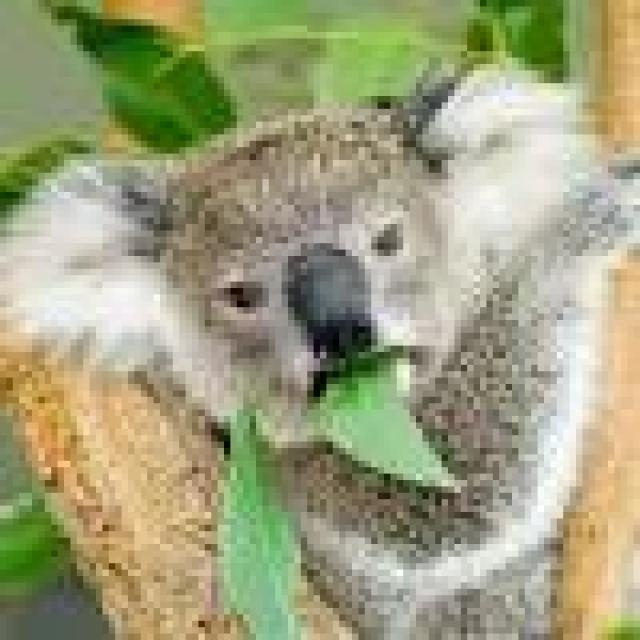

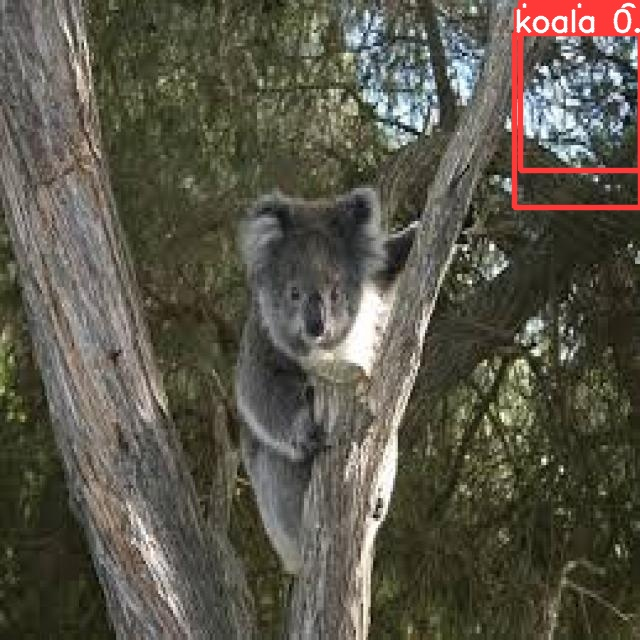

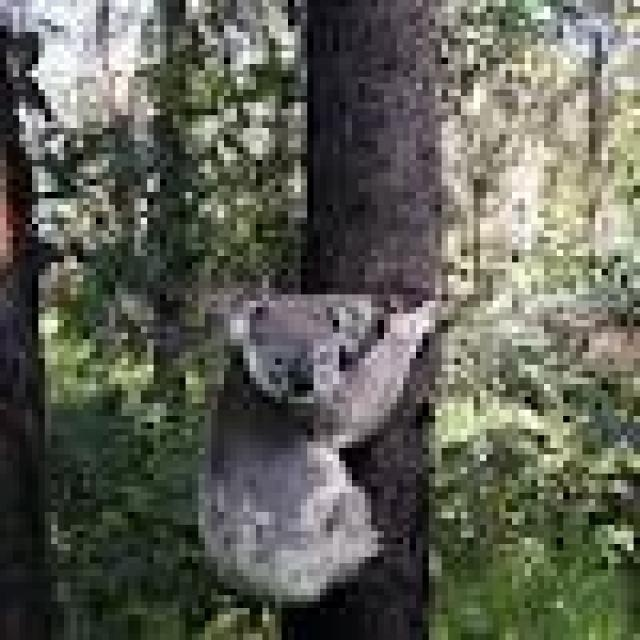

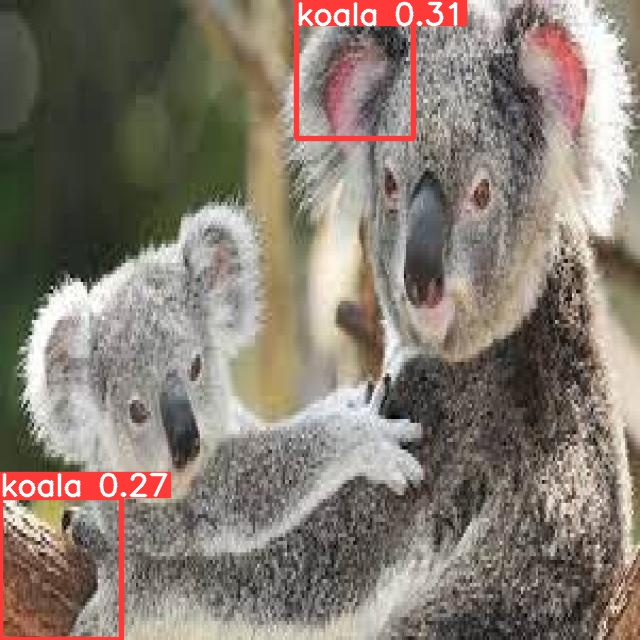

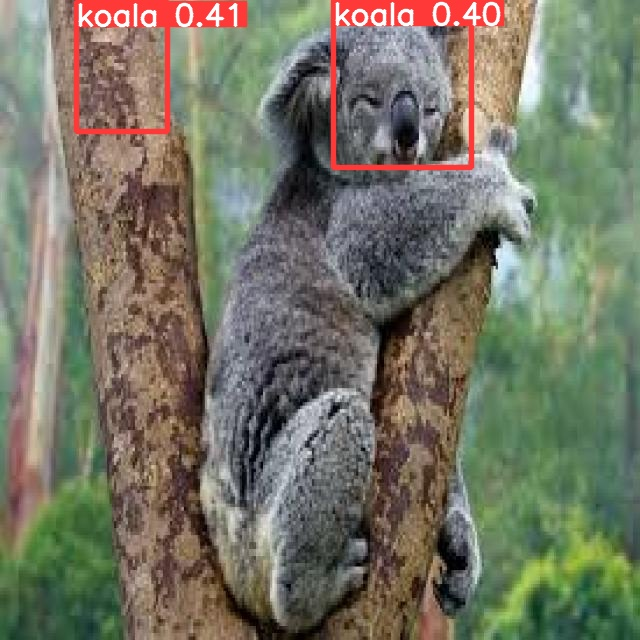

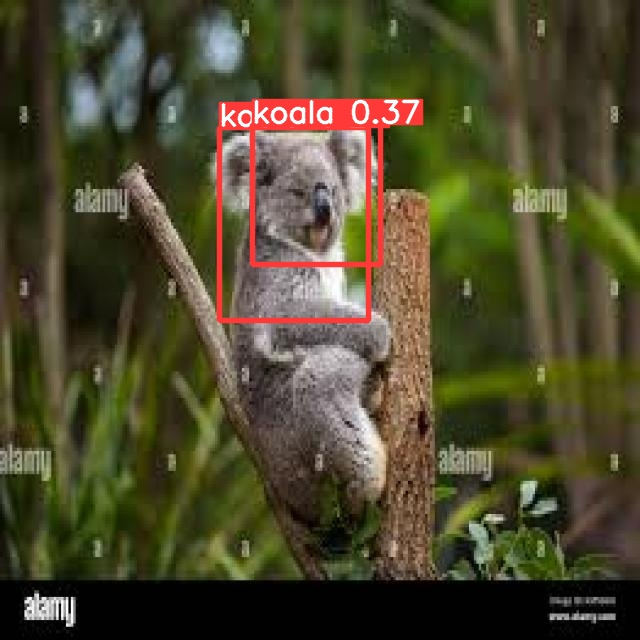

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [40]:
!yolo export model=/content/runs/detect/train3/weights/best.pt format=onnx

2023-11-27 02:15:28.847655: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 02:15:28.847738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 02:15:28.847782: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 02:15:30.856480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/runs/detect/train3/weights/best.pt with input shape (1, 3, 64

In [41]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train3/")

Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/nameplate/koala-ag6b3/1
Share your model with the world at: https://universe.roboflow.com/nameplate/koala-ag6b3/model/1


In [42]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.28
    Uninstalling ultralytics-8.0.28:
      Successfully uninstalled ultralytics-8.0.28


# Deployment on Roboflow

In [43]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train3/")

Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/nameplate/koala-ag6b3/1
Share your model with the world at: https://universe.roboflow.com/nameplate/koala-ag6b3/model/1
